In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# 1. Salary

## 1.1 
Предположим, что размер оклада зависит от опыта работы по формуле $\large salary_{c.u.} = (experience_{years} + 25) * 1000 $  
*(c.u. == conventional units == у.е.)

Постройте график зависимости размера зарплаты от опыта работы (опыт взять от 0 до 20 лет).
- Создайте вектор с размером опыта (сделайте шаг меньше, чем 1 год)  
- Создайте вектор с размером зарплаты  
- Постройте график  
- Добавьте адекватные подписи к осям и название графика

In [3]:
experience = np.arange(0, 21, 0.1)
salary = (experience + 25) * 1000
# salary = salary + salary ** 4

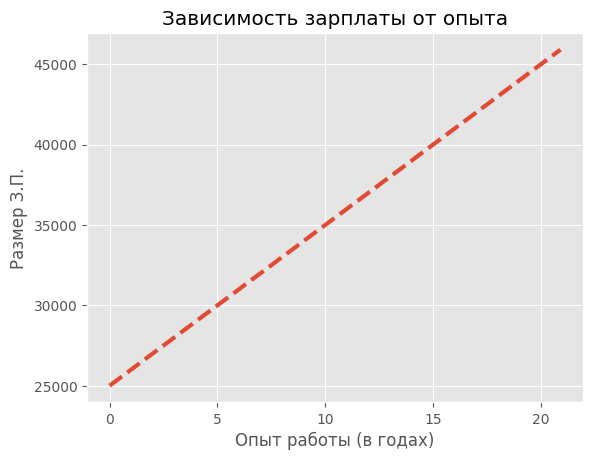

In [4]:
plt.plot(experience, salary, linewidth=3, linestyle='--')

plt.xlabel('Опыт работы (в годах)')
plt.ylabel('Размер З.П.')
plt.title('Зависимость зарплаты от опыта')

plt.show()

## 1.2 
Для полученных векторов посчитайте коэффициент корреляции Пирсона (воспользуйтесь `pearsonr` из `scipy.stats`)

In [5]:
from scipy.stats import pearsonr

In [9]:
corr = pearsonr(experience, salary)
corr

PearsonRResult(statistic=1.0, pvalue=0.0)

In [10]:
corr.statistic

1.0

## 1.3 
На полученный в пункте 1.1 график добавьте значение коэффициенты корреляции куда-то в свободное место (т.е. просто повторите график и добавьте в него коэф. с помощью `plt.text` или plt.annotate)

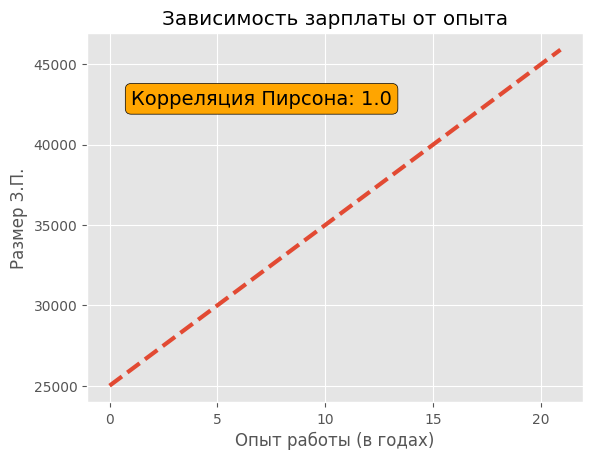

In [20]:
plt.plot(experience, salary, linewidth=3, linestyle='--')

plt.text(1, 42_500, f'Корреляция Пирсона: {corr.statistic}', fontsize=14,
        bbox=dict(facecolor='orange', edgecolor='black', boxstyle='round')) # {'facecolor':'orange', 'edgecolor':'black'...}

plt.xlabel('Опыт работы (в годах)')
plt.ylabel('Размер З.П.')
plt.title('Зависимость зарплаты от опыта')

plt.show()

# 2. A/B test
На соревнования в деревню "Спортивная" приехали спортсмены из деревень "Пирсоново" и "Спирманово". Даны две выборки: рост приехавших спортсменов из каждой деревни. 

## 2.1
Дан файл `task2_data.csv` с информацией о росте спорстменов из каждой деревни. Прочитайе файл и создайте два вектора: рост спортсменов из одной деревни и из другой.

In [27]:
# %%timeit

pears = []
spearm = []

with open('task2_data.csv', 'r', encoding='utf8') as file:
    file.readline()
    for line in file:
        line = line.strip().split(';')
        if not line:
            continue
        pears.append(float(line[0]))
        spearm.append(float(line[1]))
        
pears = np.array(pears)
spearm = np.array(spearm)


860 µs ± 216 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
pears = np.array(pears)
spearm = np.array(spearm)
type(pears)

numpy.ndarray

In [36]:
# %%timeit

pears = np.empty(50)
spearm = np.empty(50)

with open('task2_data.csv', 'r', encoding='utf8') as file:
    file.readline()
    for i, line in enumerate(file):
        line = line.strip().split(';')
        if not line:
            continue
        pears[i] = float(line[0])
        spearm[i] = float(line[1])
        

## 2.2
Постройте гистограмму роста спортсменов каждой деревни на двух разных картинках (`plt.hist`)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


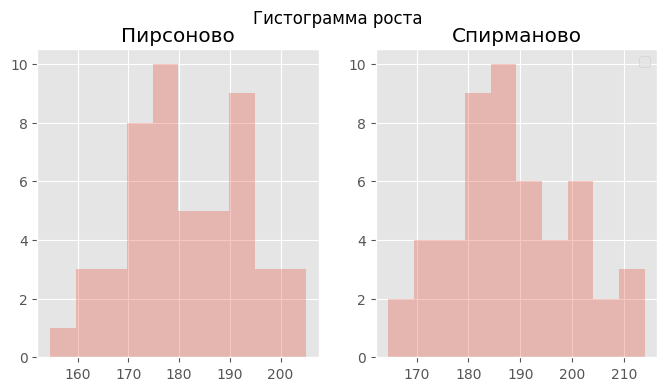

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].hist(pears, bins=10, alpha=0.3)
ax[0].set_title('Пирсоново')

ax[1].hist(spearm, bins=10, alpha=0.3)
ax[1].set_title('Спирманово')

plt.suptitle('Гистограмма роста')

plt.legend()

plt.show()

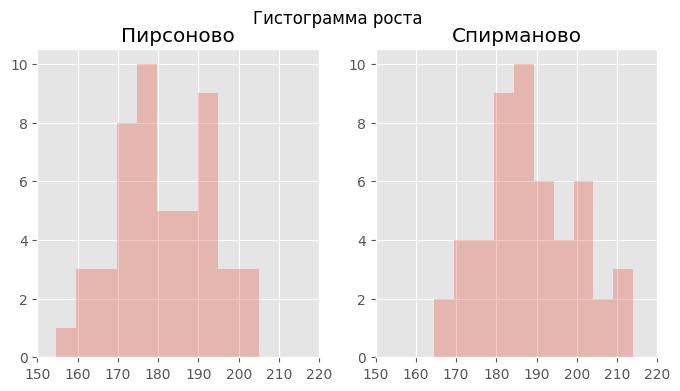

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].hist(pears, bins=10, alpha=0.3)
ax[0].set_title('Пирсоново')
ax[0].set_xticks(np.arange(150, 221, 10))

ax[1].hist(spearm, bins=10, alpha=0.3)
ax[1].set_title('Спирманово')
ax[1].set_xticks(np.arange(150, 221, 10))

plt.suptitle('Гистограмма роста')

plt.show()

## 2.3
Постройте гистограмму роста спорстменов из двух деревень на одной картинке (две гистограммы на одном холсте)

In [ ]:
plt.hist(pears, bins=10, alpha=0.3, label='Пирсоново')
plt.hist(spearm, bins=10, alpha=0.3, label='Спирманово')

plt.legend()

plt.show()

## 2.4
Было выдвинуто предположение о том, что средний рост людей в двух деревнях отличается. Давайте попробуем по имеющейся у нас выборке оценить, правда ли это.  

Определите разницу средних двух выборок. 

* Можно ли по этой разнице что-то утверждать?  
* Какие проблемы могут быть, которые делают нашу оценку несостоятельной?

In [52]:
spearm.mean() - pears.mean()

7.0310882824144585

## 2.5 (делайте пункты отдельно)
Представим, что имеющиеся у нас выборки более менее отраают реальную ситуацию в деревнях.  
Давайте проделаем следующую симуляцию (1000 раз сделайте одно и то же):
* Из каждой выборке (то есть из набора спортсменов каждой деревни) получите выборку того же размера с помощью отбора с повторением (т.е. из вектора ИКС нужно с помощью отбора с повторением получить новый вектор такой же размерности). Сделать это можно с помощью `np.random.choice`
* У нас есть два новых вектора (один получили из выборки одной деревни, другой -- из другой). Найдите разницу средних для этих векторов и сохраните эту разницу в какой-нибудь массив.
* Если повторить операции выше 1000 раз, то мы имеем 1000 разностей средних ростов, то есть уже не 1 оценку, а некоторое распределение. Для этого распределения постройте гистограмму.
* А теперь на этой гистограмме отметьте исходную разницу между средними с помощью `plt.axvline`
* Куда попала наша исходная точечная оценка? Что это может значить?

In [54]:
size = 1000
diff = np.empty(size)

for i in range(1000):
    pears_bootstrap = np.random.choice(pears, 50)
    spearm_bootstrap = np.random.choice(spearm, 50)
    diff[i] = spearm_bootstrap.mean() - pears_bootstrap.mean()

diff.shape

(1000,)

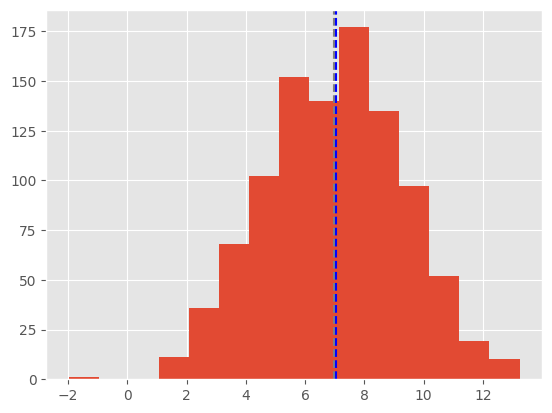

In [58]:
plt.hist(diff, bins=15)
plt.axvline(diff.mean(), linestyle='--', color='gray', label='MEAN DIFF')
plt.axvline(spearm.mean() - pears.mean(), linestyle='--', color='blue', label='INITIAL DIFF')

plt.show()

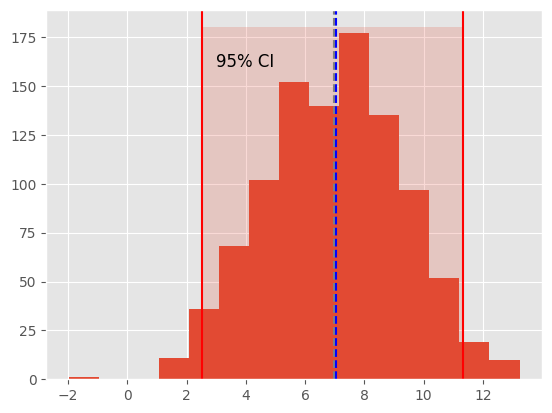

In [76]:
left, right = np.quantile(diff, [0.025, 0.975])
plt.hist(diff, bins=15)
plt.axvline(diff.mean(), linestyle='--', color='gray', label='MEAN DIFF')
plt.axvline(spearm.mean() - pears.mean(), linestyle='--', color='blue', label='INITIAL DIFF')
plt.axvline(left, color='red')
plt.axvline(right, color='red')
plt.fill_betweenx([0, 180], left, right, alpha=0.2)
plt.text(3, 160, "95% CI", fontsize=12)

plt.show()

In [60]:
np.quantile(diff, [0.05, 0.95])

array([ 3.12211013, 10.68366172])

In [61]:
np.quantile(diff, [0.01, 0.99])

array([ 1.95351637, 11.96134752])

$ H_0: \mu_s - \mu_p  = 0 $

$ H_a: \mu_s - \mu_p  \neq 0 $

In [77]:
np.quantile(diff, [0.025, 0.975])

array([ 2.52770199, 11.30941952])